## Machine Learning Model for Email Classification [ Spam/ Not Spam]

**Team Name**    : K-Nearest Party <br>

**Team members** : 
* Fnu Sowrabh
* Dhanush Biligiri
* Ram Bagaria

**Dataset Overview and Information**

Import necessary libarries 

In [1]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk import download
import re
from nltk.stem import WordNetLemmatizer

Download/Read the data(csv format) into dataframe, also changing the column names

In [3]:
data = pd.read_csv('spam_ham_dataset.csv')
data.rename(columns={
    'Unnamed: 0' : 'ID' ,
    'label': 'Label',
    'text' : 'Email_text',
    'label_num': 'Spam/Notspam'
}, inplace = True)
data.head()

,ID,Label,Email_text,Spam/Notspam
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


determining the shape of the dataset

In [4]:
data.shape

(5171, 4)

In [5]:
data.dtypes

ID               int64
Label           object
Email_text      object
Spam/Notspam     int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            5171 non-null   int64 
 1   Label         5171 non-null   object
 2   Email_text    5171 non-null   object
 3   Spam/Notspam  5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


Dataset Information 

- ID: Randomly or Automatically generated index.
- Label: Indicates whether the email is "ham" (not spam) or "spam."
- Email_text: Contains the content of the email.
- Spam/Notspam: A numerical representation of the label (e.g., "ham" = 0, "spam" = 1).

**EDA (Exploratory Data Analysis)**

Check for missing values and duplicates

In [7]:
data.isnull().sum()

ID              0
Label           0
Email_text      0
Spam/Notspam    0
dtype: int64

In [8]:
data.duplicated().sum()

0

Check for the distribution of emails

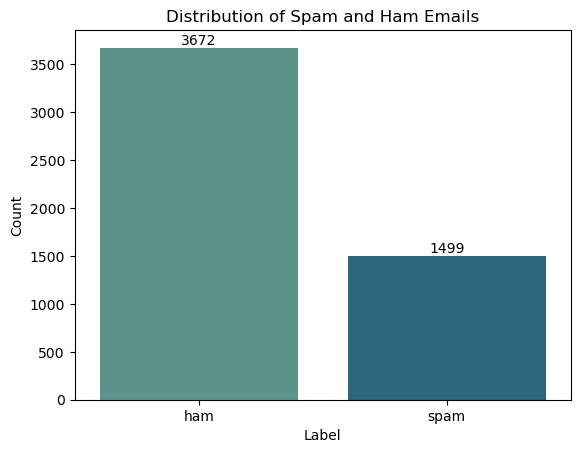

In [9]:
# sns.countplot(x='Label', data=data, hue='Label' ,palette='crest')
# plt.title('Distribution of Spam and Ham Emails')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.show()

ax = sns.countplot(x='Label', data=data, hue='Label', palette='crest')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Adding text length and word count columns to the dataframe

In [10]:
data['Text_length'] = data['Email_text'].apply(len)
data['Word_count'] = data['Email_text'].apply(lambda x: len(str(x).split()))
data.head()

,ID,Label,Email_text,Spam/Notspam,Text_length,Word_count
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,67
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,23
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,550
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,48
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,70


Check for the distribution of email text and word count by plotting histograms

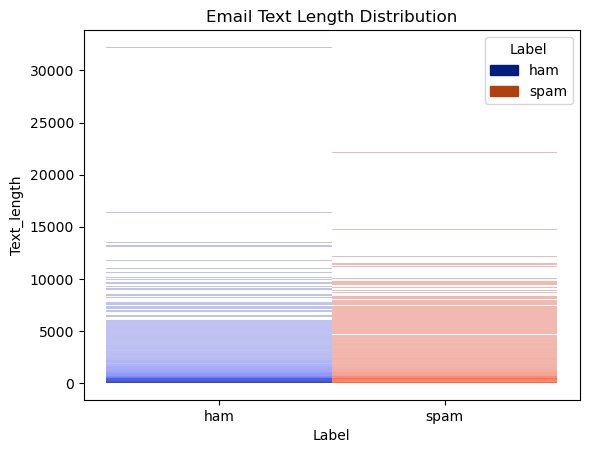

In [11]:
sns.histplot(x='Label', y='Text_length',hue='Label', data=data, palette='dark')
plt.title('Email Text Length Distribution')
plt.show()

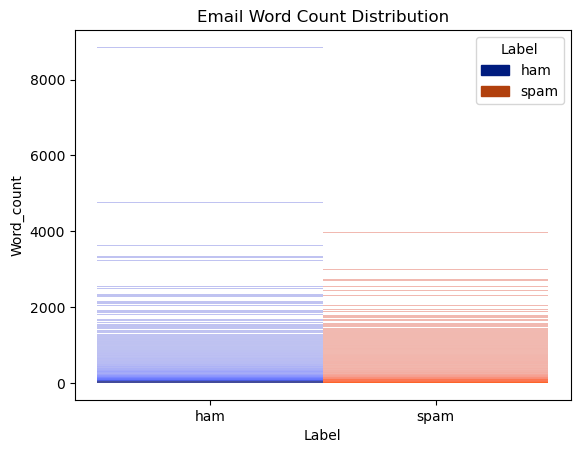

In [12]:
sns.histplot(x='Label', y='Word_count',hue='Label', data=data, palette='dark')
plt.title('Email Word Count Distribution')
plt.show()

**Data Cleaning / Preprocessing and Splitting of the data**

Text preprocessing using tokenization, stopwords, lowercasing and TfidfVectorizer from scikit-learn to convert text into numerical features

In [13]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sowrabhnaik/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sowrabhnaik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sowrabhnaik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    text = text.lower()

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

data['Processed_Text'] = data['Email_text'].apply(preprocess_text)

X_train_text, X_test_text, y_train, y_test = train_test_split(
    data['Processed_Text'], data['Spam/Notspam'], test_size=0.2, random_state=20
)
vectorizer = TfidfVectorizer(max_features=3000)
X_train = vectorizer.fit_transform(X_train_text).toarray()
X_test = vectorizer.transform(X_test_text).toarray()

In [15]:
data.head()

,ID,Label,Email_text,Spam/Notspam,Text_length,Word_count,Processed_Text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,67,subject enron methanol meter follow note gave ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,23,subject hpl nom january see attached file hpln...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,550,subject neon retreat ho ho ho around wonderful...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,48,subject photoshop window office cheap main tre...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,70,subject indian spring deal book teco pvr reven...


**Model Creation and evaluation** <br>

- Multinomial Naive Bayes
- Gaussian Naïve Bayes

1.  **Multinomial Naive Bayes Model**
MultinomialNB() to train a Naive Bayes model. <br>
Training the model on the training set and making predictions on the testing set.<br>
Evaluating metrics of the model using the following metrics :
- Accuracy score
- Confusion matrix
- Recall
- F1 score
- Precision

In [16]:
Naive_bayes = MultinomialNB()
Naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [17]:
y_pred_NB = Naive_bayes.predict(X_test)

print("Multinomial Naive Bayes Results")

print("Accuracy:", accuracy_score(y_test, y_pred_NB))

print(classification_report(y_test, y_pred_NB))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_NB))

print("Recall:", recall_score(y_test, y_pred_NB))

print("F1 score:", f1_score(y_test, y_pred_NB))

print("Precision:", precision_score(y_test, y_pred_NB))

Multinomial Naive Bayes Results
Accuracy: 0.9507246376811594
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       744
           1       0.88      0.95      0.92       291

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035

Confusion Matrix:
 [[707  37]
 [ 14 277]]
Recall: 0.9518900343642611
F1 score: 0.915702479338843
Precision: 0.8821656050955414


2.  **Gaussian Naive Bayes**
GaussianNB() to train a Guassian Naive Bayes model. <br>
Training the model on the training set and making predictions on the testing set.<br>
Evaluating metrics of the model using the following metrics :
- Accuracy score
- Confusion matrix
- Recall
- F1 score
- Precision

In [18]:
GaussianNB = GaussianNB()
GaussianNB.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred_GNB = GaussianNB.predict(X_test)

print("Gaussian Naive Bayes Results")

print("Accuracy:", accuracy_score(y_test, y_pred_GNB))

print(classification_report(y_test, y_pred_GNB))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_GNB))

print("Recall:", recall_score(y_test, y_pred_GNB))

print("F1 score:", f1_score(y_test, y_pred_GNB))

print("Precision:", precision_score(y_test, y_pred_GNB))

Gaussian Naive Bayes Results
Accuracy: 0.978743961352657
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       744
           1       0.96      0.97      0.96       291

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035

Confusion Matrix:
 [[732  12]
 [ 10 281]]
Recall: 0.9656357388316151
F1 score: 0.9623287671232876
Precision: 0.9590443686006825
